# **Data**

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!ls /content/drive/MyDrive/

'04_Anuja_Vaidya_C1_DIVP_LAB8_(1) (1).ipynb'
 1729673122090.jpg
'3.2 ICR using SDTS.gdoc'
 A39_Nikunj_FIVP_LAB4.ipynb
 AI_Russell_Norvig_copy.pdf
 and_result.jpg
 basic.docx
'Bit_S (1).gdoc'
 Bit_S.gdoc
'Blank Quiz.gform'
'Bonafide Certificate.pdf'
 BOOKS
 C-04Anuja.docx
 c1_07_cn_lab3.docx
'C1_12 CN P4 (Mayuri Lakhotia) (3).gdoc'
'C1_12 CN P5 (Mayuri Lakhotia).gdoc'
'C1_12 DBMS Practical No. 2.gdoc'
'C1_12 DBMS Practical No. 3.gdoc'
'C1_12 DBMS Practical No. 4.gdoc'
'C1_12 DIVP Internal Lab Exam .ipynb'
 C1_12_DIVP_Practical_No_3.ipynb
 C1_12_DIVP_Practical_No_4.ipynb
'C1_12 DIVP Practical No. 5.ipynb'
 C1_12_DIVP_Practical_No_7.ipynb
'C1_12 DL Practical No. 3 (2).ipynb'
'c1_12 exp 3.gdoc'
'c1_12 exp 3.pdf'
'C1_12 (Mayuri Lakhotia).pdf'
'C1_12 ML Practical No. 5 (1).ipynb'
'C1_12 NLP Practical No. 6.ipynb'
'C1_12 NLP Practical No. 7.ipynb'
'C1_12 NLP Practical No. 8.ipynb'
'C1_14_DIVP_Practical_No_7 (1).ipynb'
'C1_14 DL Practical No. 6.ipynb'
'C1_16 DIVP Practical No. 3.ipynb'
 CA_pre

In [50]:
%cd /content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage

/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Importing Data
df = pd.read_csv('/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage/events.csv')

# Data **Exploration**

In [53]:
print("First 5 rows:","\n")
df.head()

First 5 rows: 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0


In [54]:
print("Last 5 rows:","\n")
df.tail()

Last 5 rows: 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 23:00:00,2022-01-01 00:00:00,10812.0


In [55]:
print("Shape of the dataset:","\n")
df.shape

Shape of the dataset: 



(52966, 5)

In [56]:
print("Dataset info:","\n")
df.info()

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [57]:
print("Statistical summary:","\n")
print(df.describe())

Statistical summary: 

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000


In [58]:
df = pd.read_csv("events.csv")
print(df.columns)

Index(['Start time UTC', 'End time UTC', 'Start time UTC+03:00',
       'End time UTC+03:00', 'Electricity consumption in Finland'],
      dtype='object')


In [59]:
df.columns = df.columns.str.strip()  # Remove extra spaces from column names
df['Start time UTC'] = pd.to_datetime(df['Start time UTC'])  # Parse dates
df.set_index('Start time UTC', inplace=True)  # Set datetime index


In [60]:
print("Dataset covers from", df.index.min(), "to", df.index.max())


Dataset covers from 2015-12-31 21:00:00 to 2021-12-31 20:00:00


In [61]:
# Install the package if not already installed
!pip install ydata-profiling

# Import and create a profiling report
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="Energy Consumption Data Report", explorative=True)

# Display the report (in Jupyter or Colab)
profile.to_notebook_iframe()

# Save the report as HTML
profile.to_file("energy_consumption_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Feature Extraction**

In [117]:
columns_to_drop = ["Start time UTC", "End time UTC", "Start time UTC+03:00"]

df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

df.rename(columns={"End time UTC+03:00": "DateTime", "Electricity consumption in Finland": "Consumption"}, inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [118]:
# Date Features
df["DateTime"] = pd.to_datetime(df["DateTime"])
df["Month"] = df["DateTime"].dt.month
df["Year"] = df["DateTime"].dt.year
df["Date"] = df["DateTime"].dt.date
df["Time"] = df["DateTime"].dt.time
df["Week"] = df["DateTime"].dt.isocalendar().week
df["Day"] = df["DateTime"].dt.day_name()

# Set index as datetime
df.set_index("DateTime", inplace=True)

In [119]:
# Assuming 'dataset' is meant to be 'df', define it:
dataset = df

dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday


In [120]:
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())

Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [121]:
# 31-12-2015 -> Thursday
# 31-12-2015 to 4-1-2016 (11 AM) -> 4 days -> 4 x 24 = 96 - 25 = 71
# 31-12-2021 to 26-12-2021 -> 5 days = 5 x 24 = 120 + 1 = 121
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016.
# The closest end would be on sunday 26-12-2021.
# So we should omit first 71 rows and last 121 rows to trim the datasets to full weeks.
dataset = dataset[71:-121]
dataset.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday
2021-12-26 22:00:00,12384.0,12,2021,2021-12-26,22:00:00,51,Sunday
2021-12-26 23:00:00,12044.0,12,2021,2021-12-26,23:00:00,51,Sunday


# **Data Visualizations**

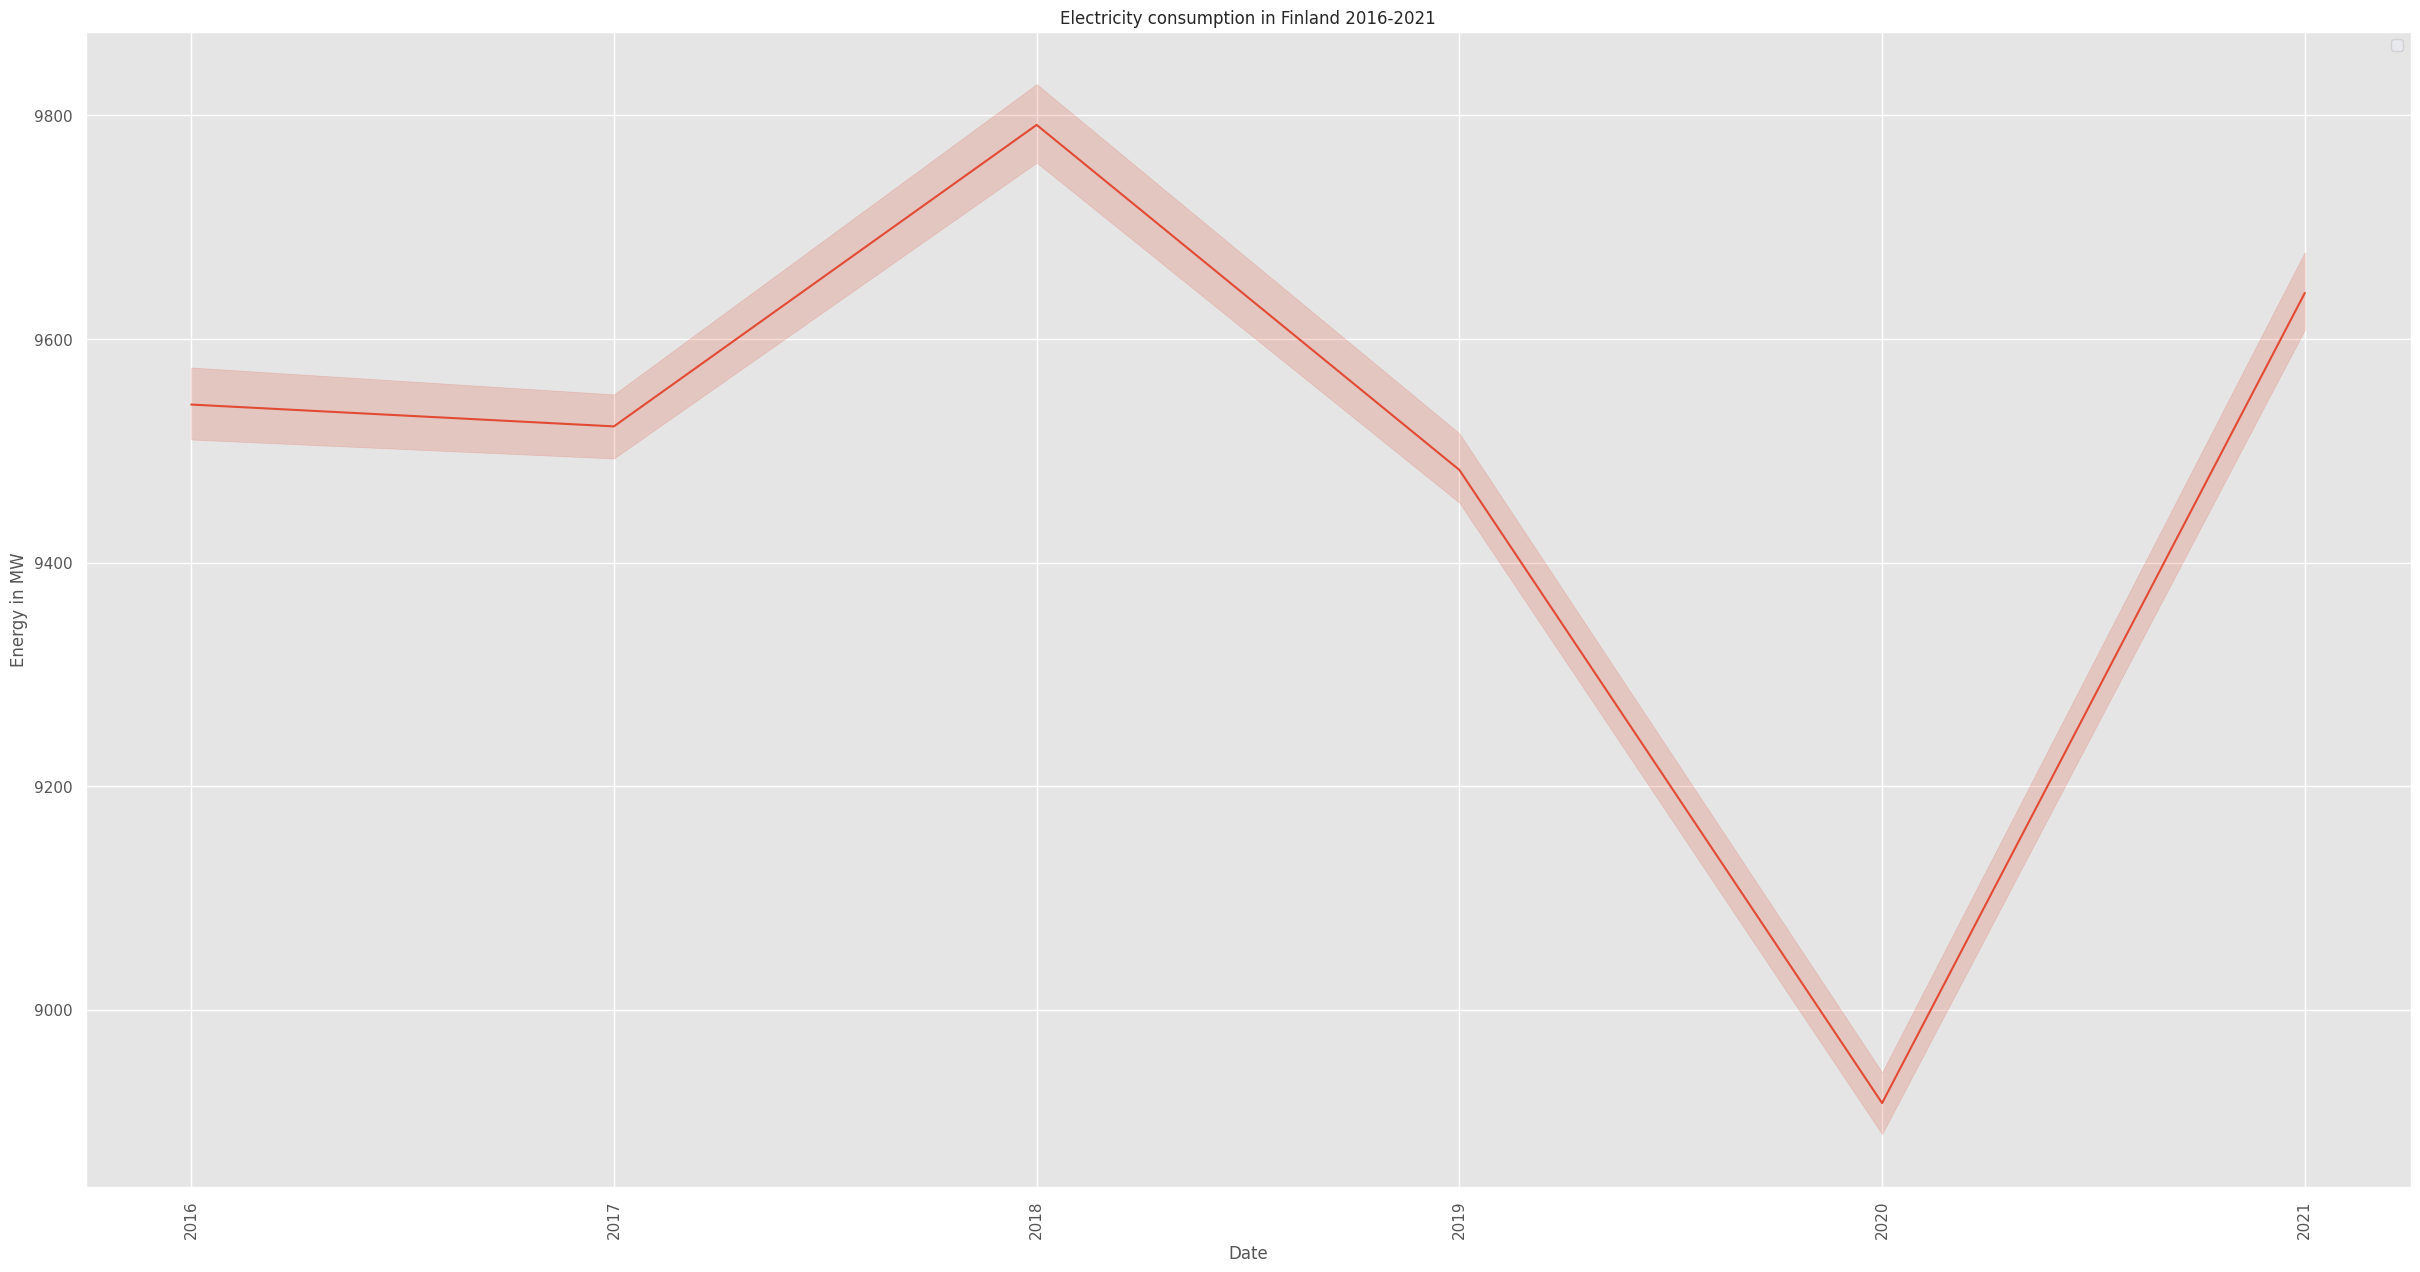

In [122]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption in Finland 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)

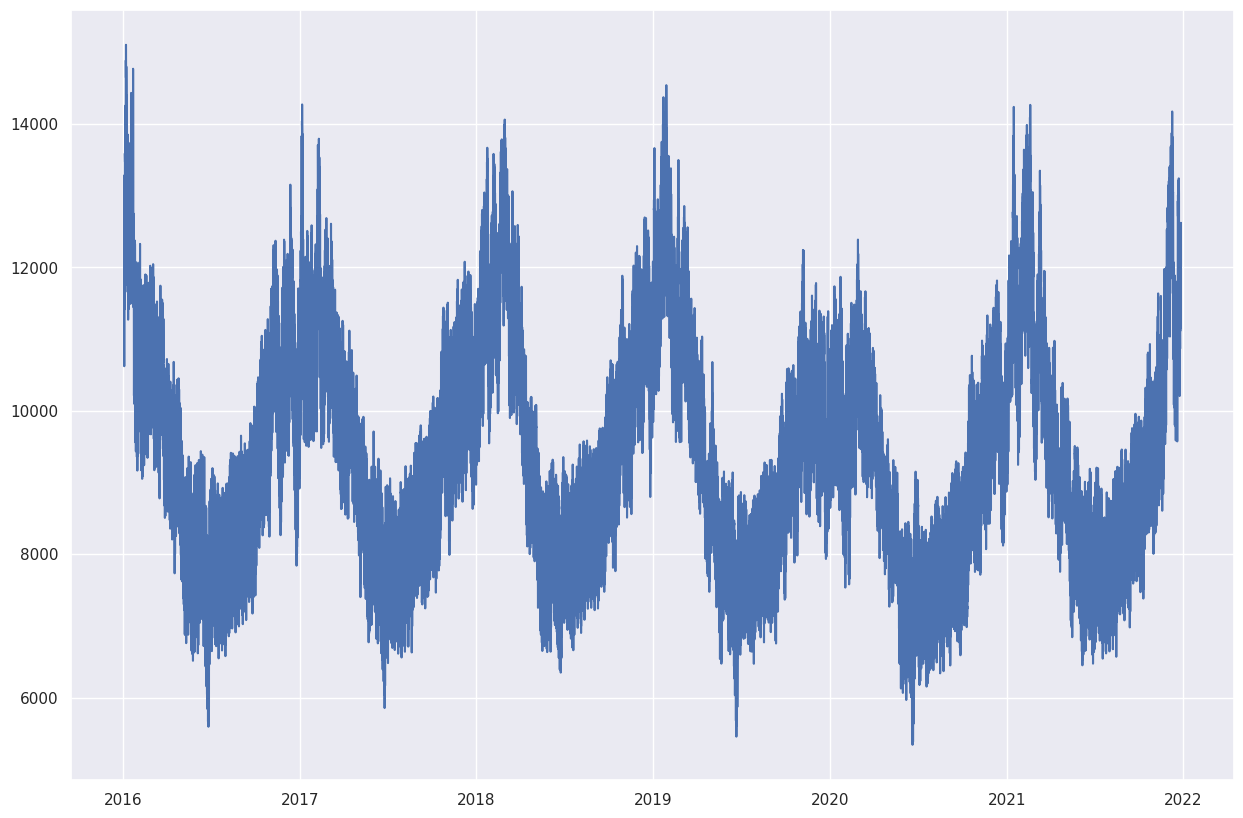

In [123]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Consumption"])

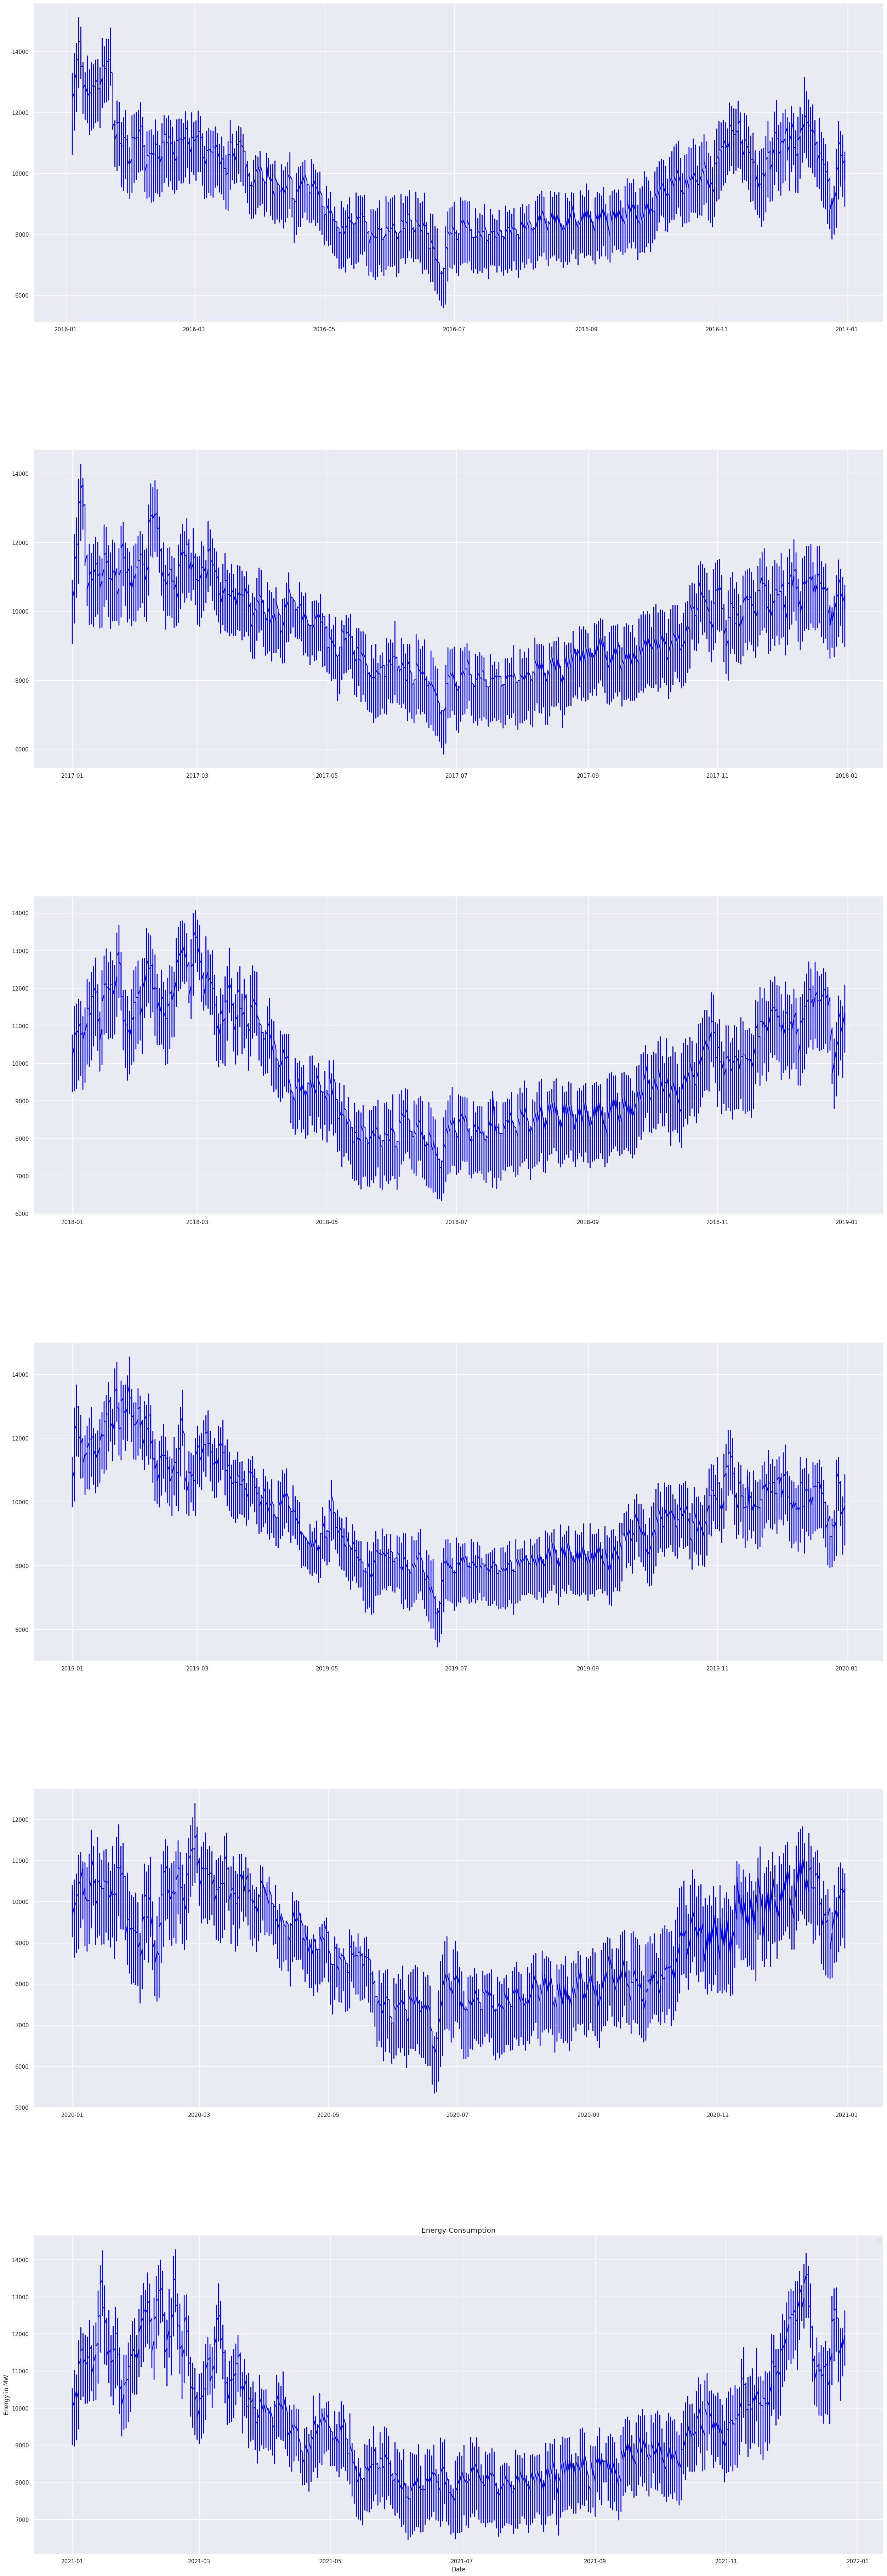

In [124]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

y_2016 = dataset.loc["2016"]["Consumption"].to_list()
x_2016 = dataset.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = dataset.loc["2017"]["Consumption"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = dataset.loc["2018"]["Consumption"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = dataset.loc["2019"]["Consumption"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2020"]["Consumption"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2021"]["Consumption"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

Text(0.5, 1.0, 'Energy Distribution')

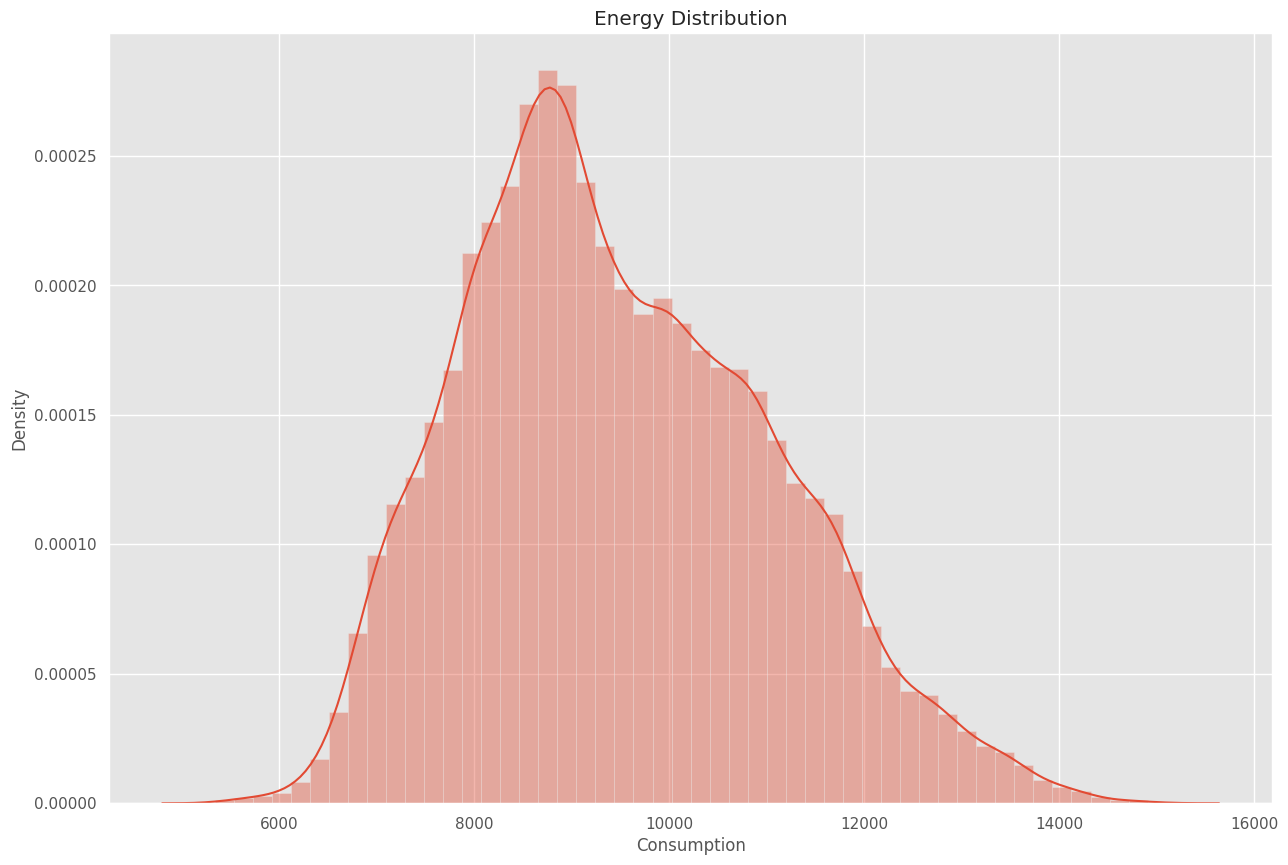

In [125]:
# Distribution off Energy Consumption
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

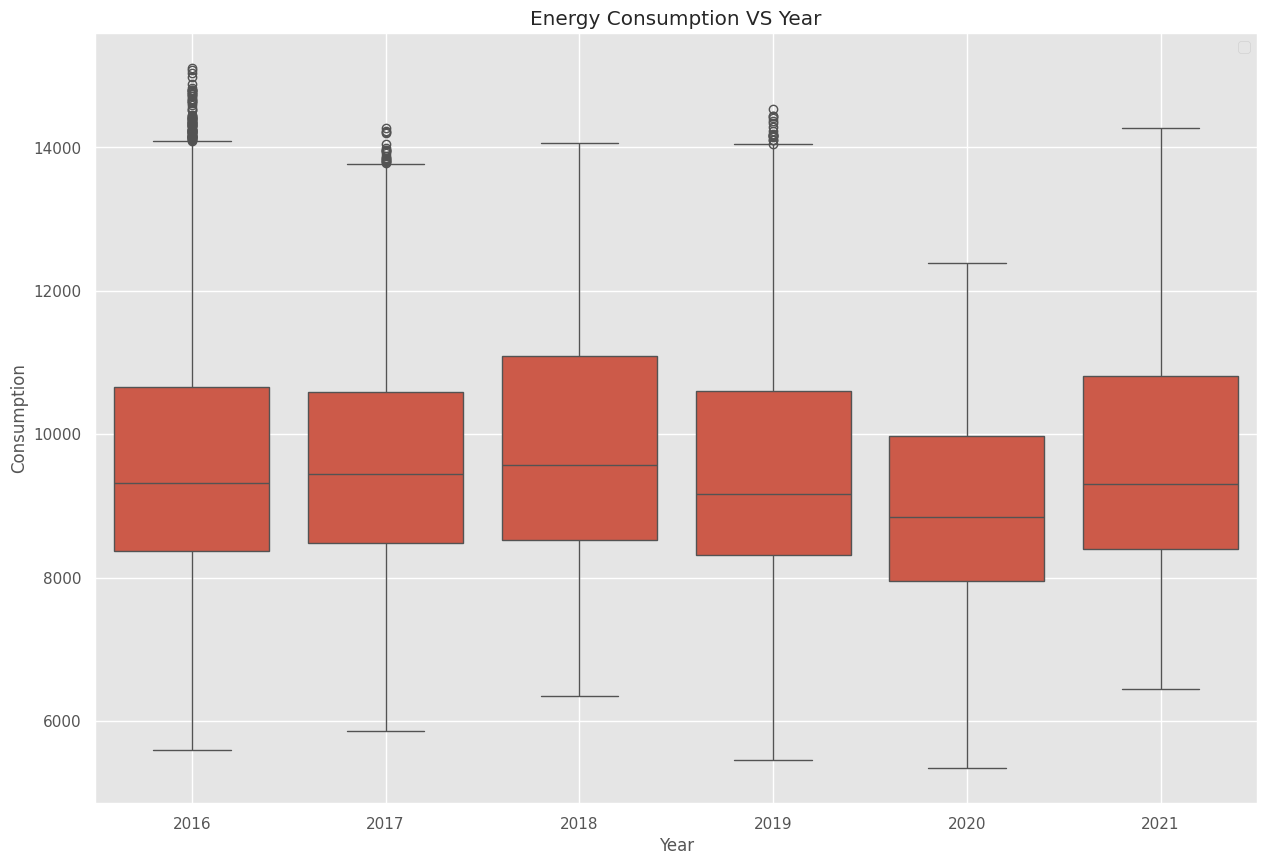

In [127]:
fig = plt.figure(figsize = (15,10))
# Use 'dataset' instead of 'df' for consistency
sns.boxplot(x=dataset.index.year, y=dataset.Consumption, data=dataset)
plt.title("Energy Consumption VS Year")
plt.xlabel("Year")
plt.grid(True, alpha=1)
plt.legend()

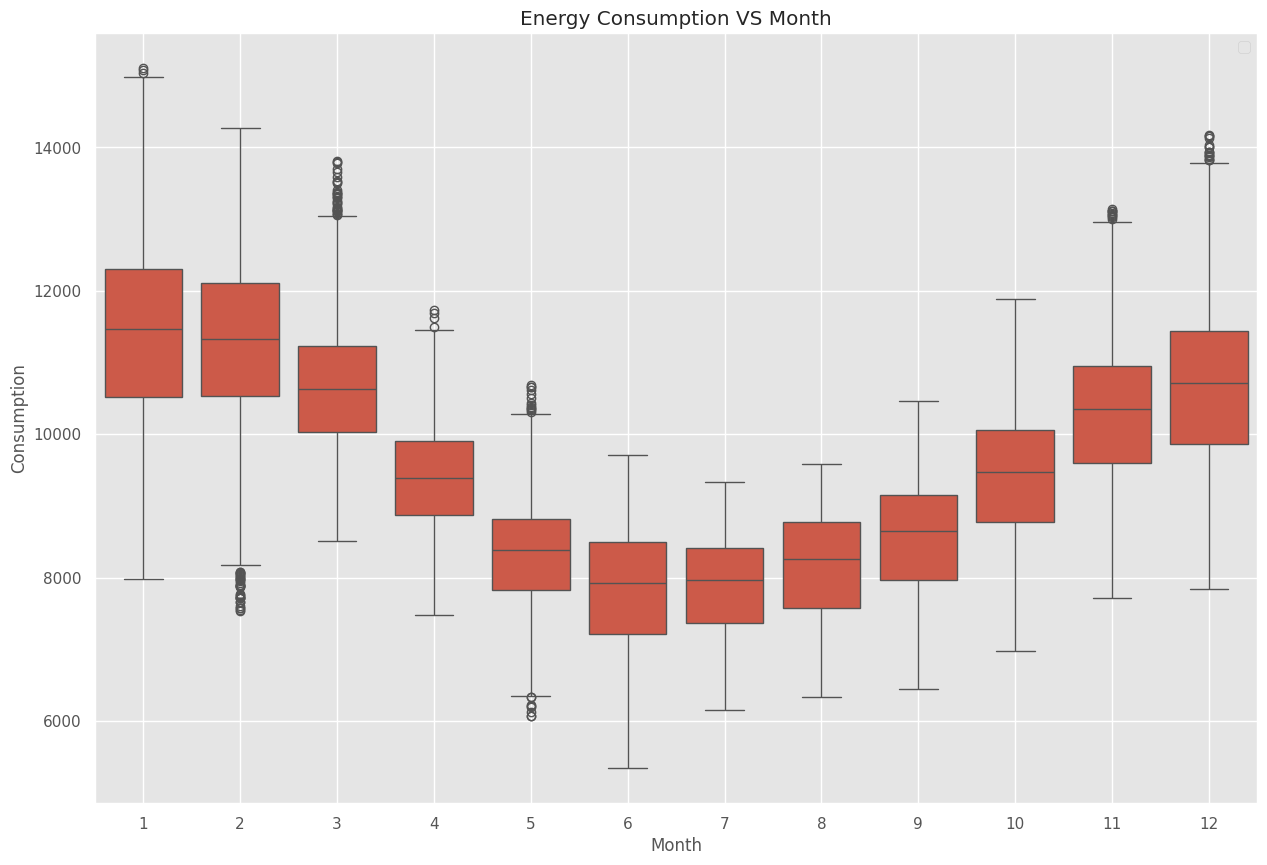

In [71]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["Month"], y=dataset["Consumption"], data= df)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

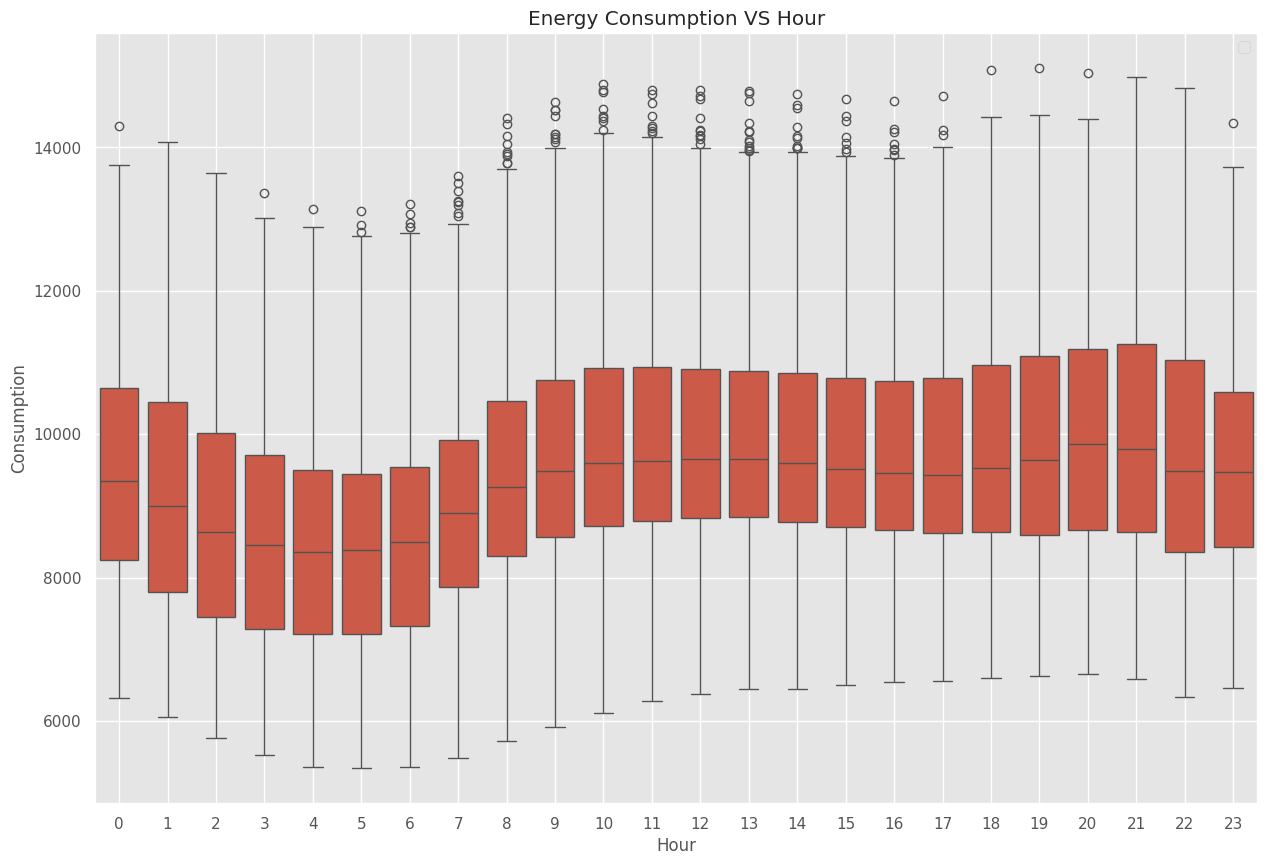

In [72]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset.index.hour, y=dataset.Consumption, data=dataset)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

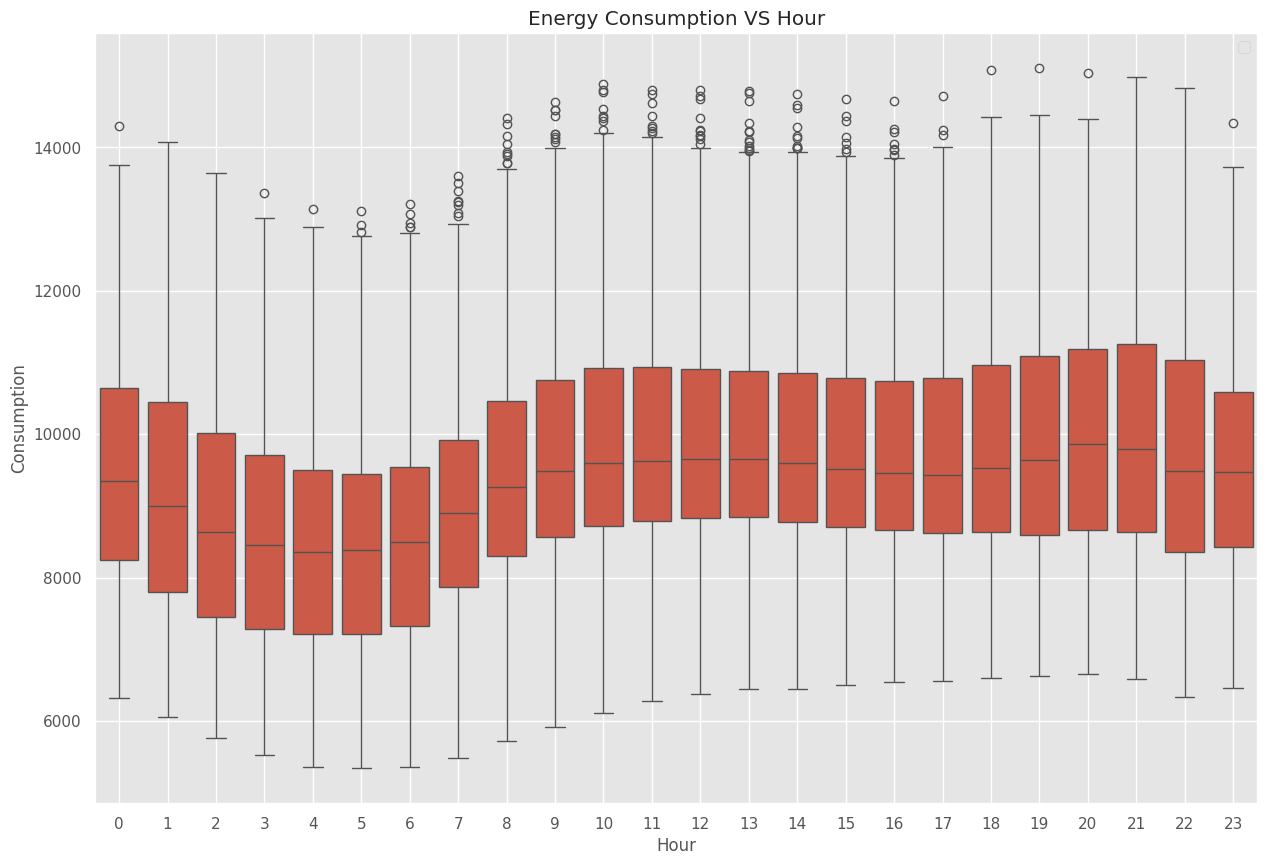

In [73]:
fig = plt.figure(figsize = (15,10))
# Use dataset1 consistently for both data and x, y values
sns.boxplot(x=dataset.index.hour, y=dataset.Consumption, data=dataset)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

# **LSTM Model**

## Train, Validation and Test Dataset

In [74]:
# First, ensure the index is datetime type
dataset.index = pd.to_datetime(dataset.index)

# Drop non-numeric columns (like date fields) if any
numeric_dataset = dataset.select_dtypes(include=["number"])

# Downsample from hourly to daily
newDataSet = numeric_dataset.resample("D").mean()

In [75]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones (NaN values -> after resampling)
# 2184 / 7 = 312 week
# Train - Test split = 80:20
# 312 * 80 %  250 week for train (250 x 7 = 1750 day)
# 312 - 250 = 62 week for test (62 x 7 = 434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


In [76]:
# Saving data in CSV new file
newDataSet.to_csv("newDataSet.csv")
from google.colab import files
files.download("newDataSet.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
newDataSet.head()

,Consumption,Month,Year,Week
DateTime,,,,
2016-01-04,12300.625000,1.0,2016.0,1.0
2016-01-05,12945.375000,1.0,2016.0,1.0
2016-01-06,13192.750000,1.0,2016.0,1.0
2016-01-07,14243.541667,1.0,2016.0,1.0
2016-01-08,14121.666667,1.0,2016.0,1.0


In [78]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

12300.625


(2184,)

In [79]:
# Normalize data before model fitting
# It will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler

# Scale of the output and input in the range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1))

# Reshape: Convert the univariate 1D array into 2D
# Univariate 1D = (2184,)
# Univariate 2D = (2184,1)

y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])

Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [80]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]


In [81]:
# Building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0] # Day 1 to 3 -> Predict Day 4 (eg. time_step = 3)
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [82]:
# create_dataset() = (samples, time_step)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

In [83]:
# Reshape train and input-output pairs (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)

X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


## Model Structure

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [85]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [86]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 60 ,batch_size = 20)

Epoch 1/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0528 - val_loss: 0.0047
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0076 - val_loss: 0.0050
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0069 - val_loss: 0.0038
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0062 - val_loss: 0.0039
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0061 - val_loss: 0.0036
Epoch 8/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 9/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0053 - val_loss: 0.0035
Epoch 10/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 11/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 12/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
from tensorflow.keras.models import load_model
import joblib

# Change to your project directory
%cd /content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage

# Save the trained LSTM model
model.save("LSTM-Model.h5")

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")

/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage
✅ Model and scaler saved successfully!


## Model Evaluating

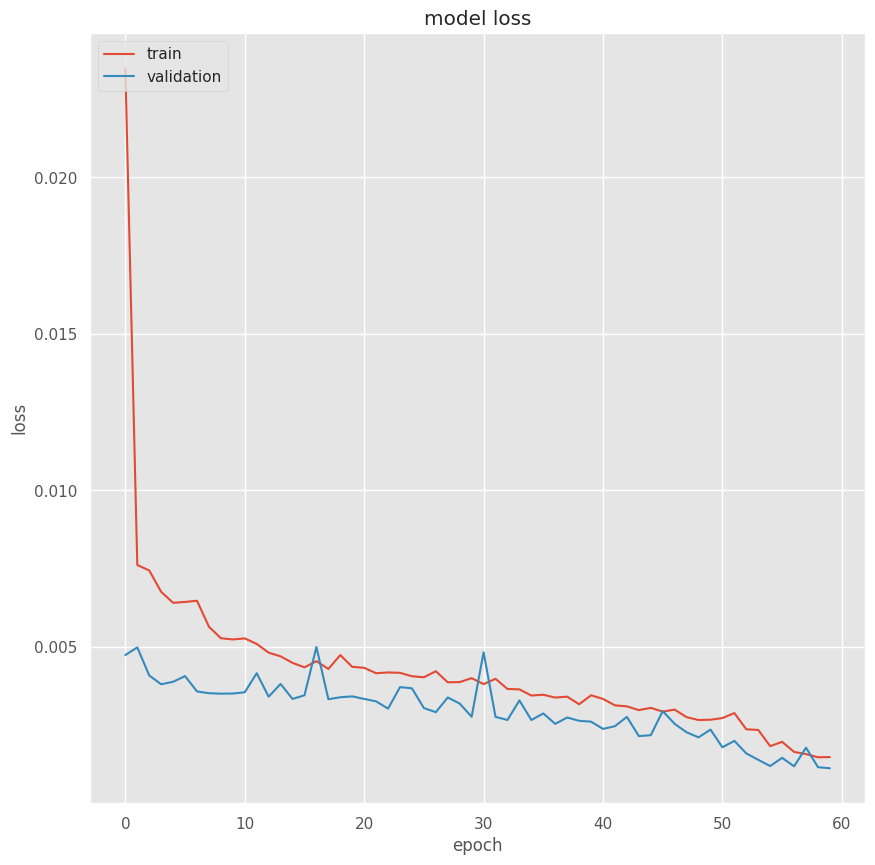

In [89]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [90]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [91]:
# Lets do the prediction and check performance metrics
# (samples, features)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [92]:
# Transform back to original form -> Inverse Transform
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [93]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9604.946699035469

In [96]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

(1297, 1)
(336, 1)
(248, 1)
[9408.211]
(1297,)


## Conclusion

In [97]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,Train Predictions,Actuals
0,[9408.2109375],[9406.708333333334]
1,[9550.376953125],[9614.791666666666]
2,[9693.1884765625],[9894.708333333334]
3,[9485.572265625],[8933.708333333334]
4,[8606.06640625],[8557.208333333334]
...,...,...
1292,[8854.2890625],[9259.666666666666]
1293,[9672.7919921875],[10248.5]
1294,[10307.2890625],[10360.333333333334]
1295,[10365.3505859375],[10489.833333333334]


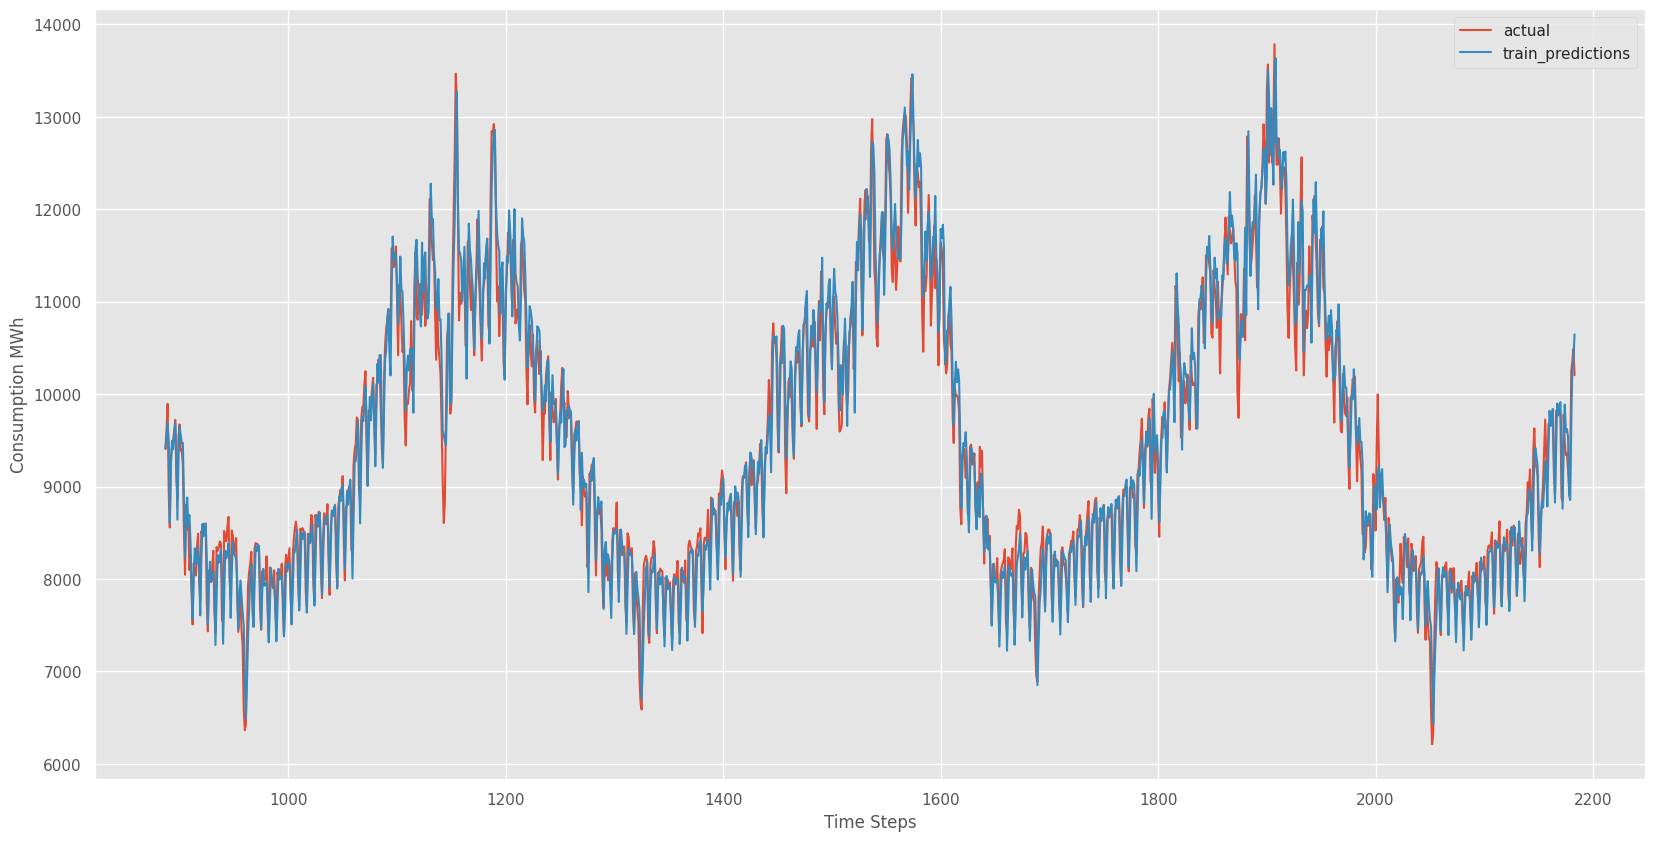

In [98]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [99]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


,Val Predictions,Actuals_val
0,[9414.1884765625],[8931.875]
1,[9419.794921875],[9112.916666666666]
2,[9282.029296875],[10019.416666666666]
3,[9948.6044921875],[10390.375]
4,[10529.9482421875],[10802.916666666666]
...,...,...
243,[8303.181640625],[8020.541666666667]
244,[7720.9765625],[7921.75]
245,[8145.55517578125],[8705.041666666666]
246,[8736.1162109375],[8824.708333333334]


Text(0, 0.5, 'Consumption MWh')

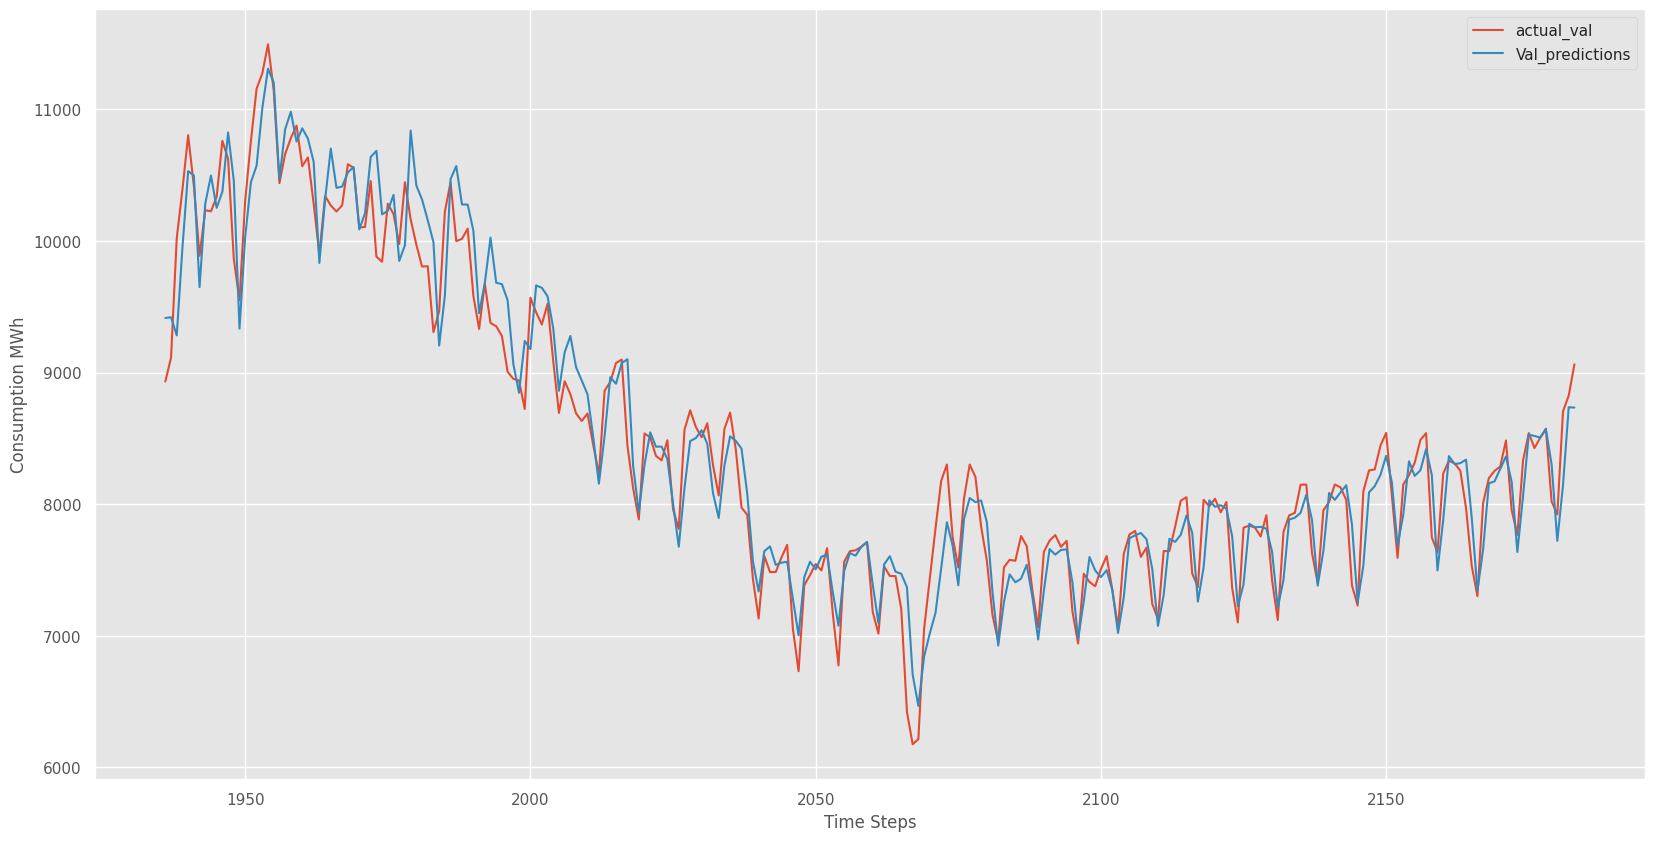

In [100]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

In [101]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


,test Predictions,Actuals_test
0,[10552.3349609375],[10032.541666666666]
1,[10898.650390625],[10732.125]
2,[11191.060546875],[10733.583333333334]
3,[10912.5615234375],[10971.875]
4,[11269.818359375],[11227.791666666666]
...,...,...
331,[12485.935546875],[12540.25]
332,[12647.259765625],[12635.958333333334]
333,[12927.0234375],[11684.333333333334]
334,[11496.0224609375],[11384.166666666666]


No charts were generated by quickchart


Text(0, 0.5, 'Consumption MWh')

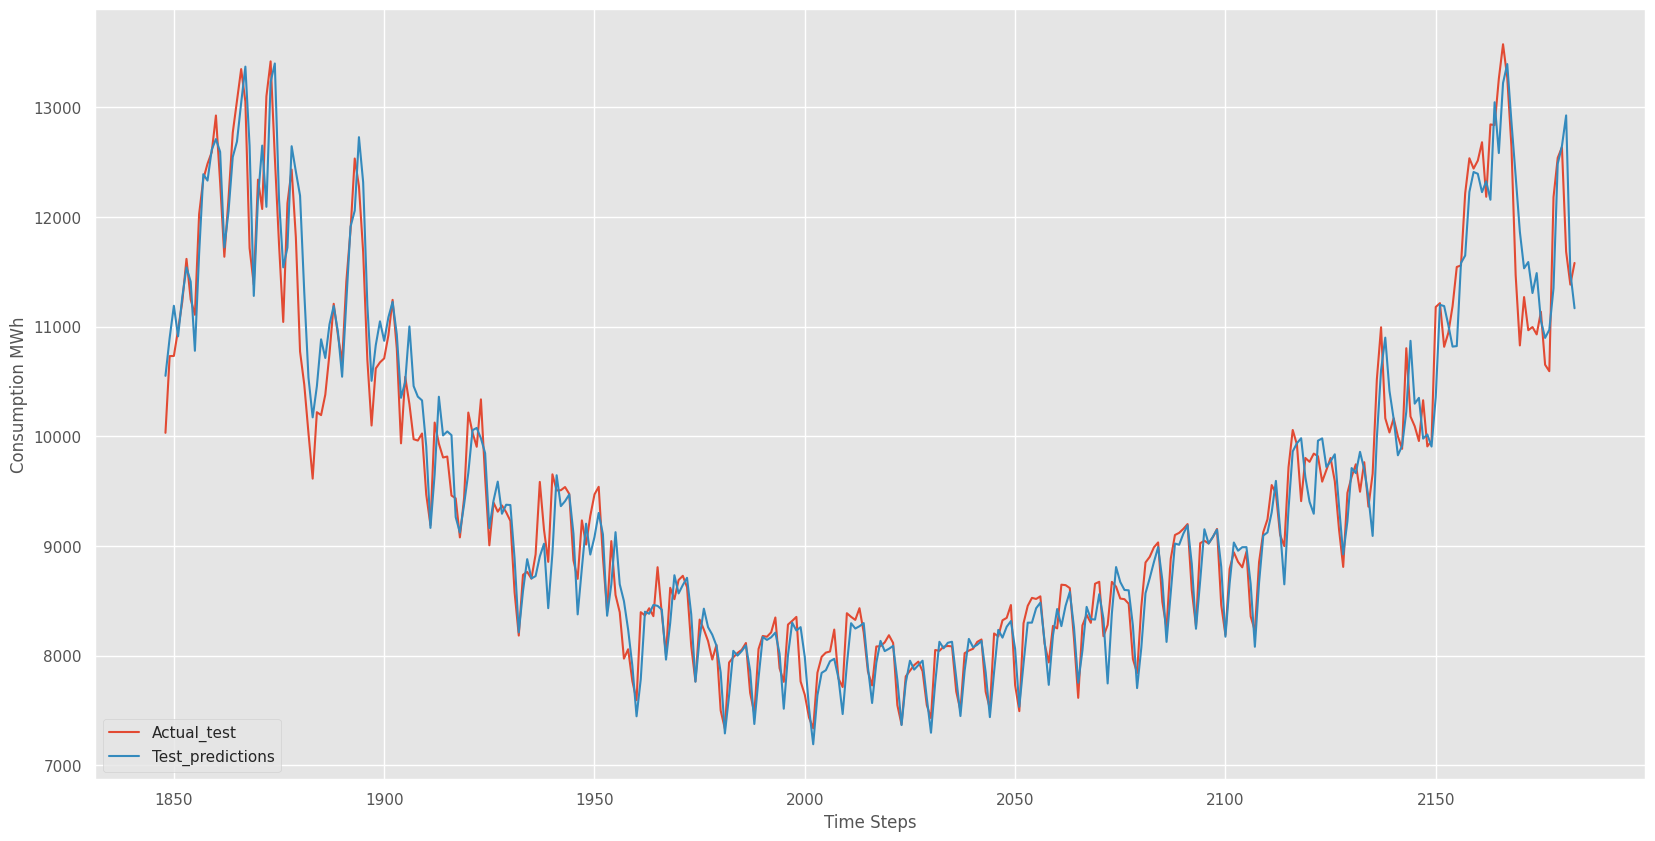

In [102]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

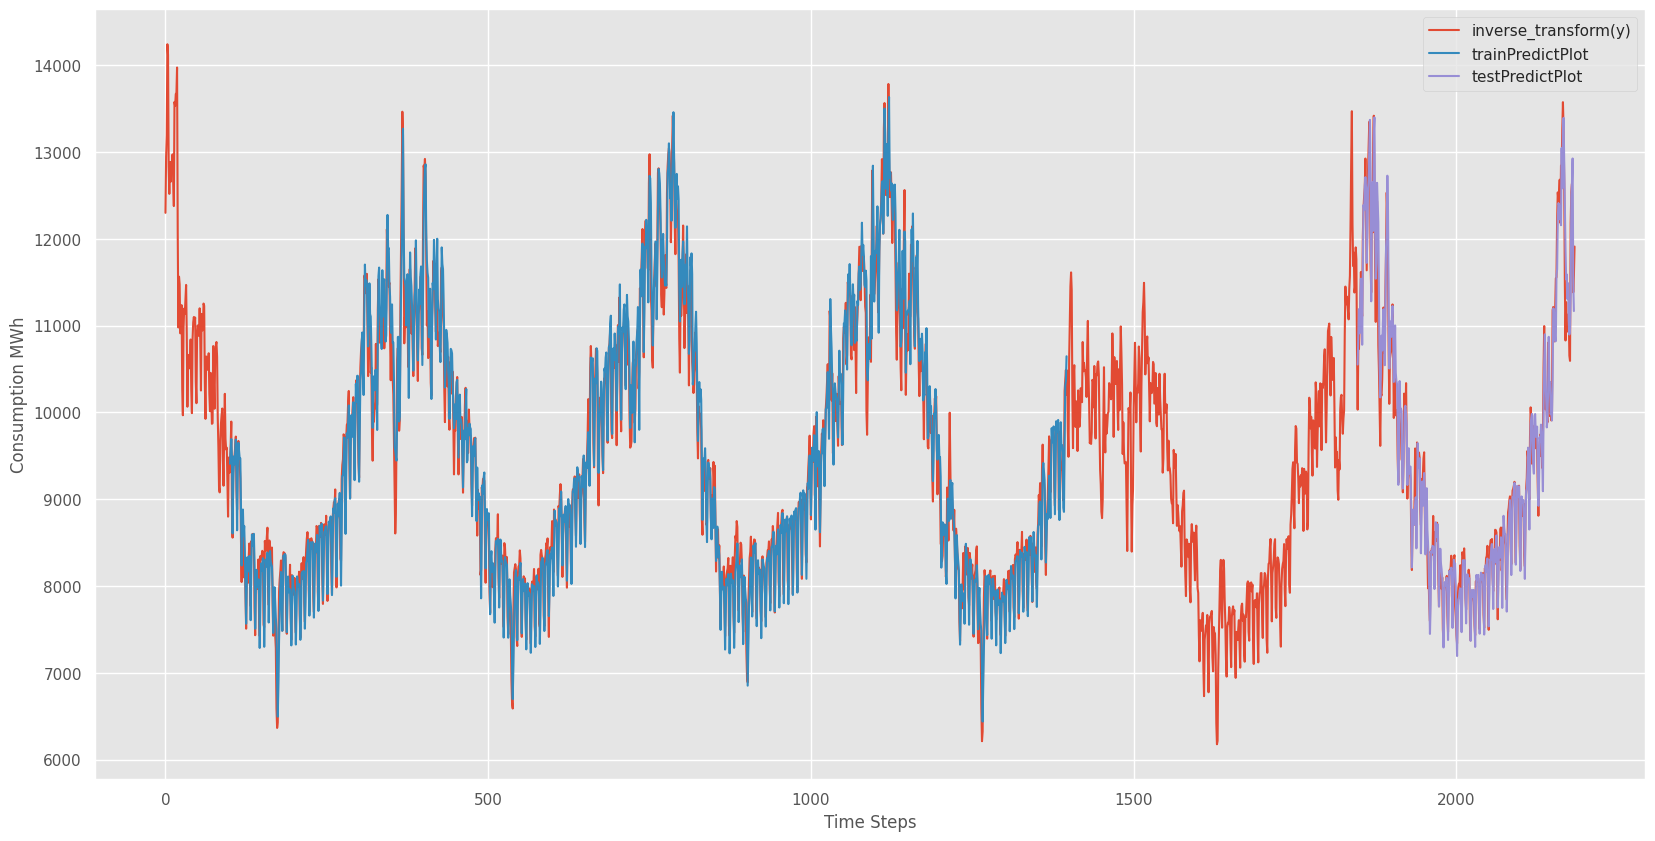

In [103]:
### Plotting
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

# **Future forecasting**

In [104]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [105]:
# Demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100 # time_steps
i=0
test = ""
while(i<30): # Assume i<30

    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

1 day input [0.25709121 0.33563165 0.36255552 0.36498812 0.36948662 0.37489412
 0.30034604 0.25916744 0.35327446 0.35606342 0.3529749  0.36009193
 0.36937816 0.28358124 0.249561   0.32426919 0.3429811  0.33217643
 0.32601487 0.34354922 0.27053507 0.25411631 0.33202665 0.36575767
 0.38037909 0.41900114 0.40965809 0.36264332 0.34998967 0.43912819
 0.48126743 0.46479186 0.40083153 0.44962814 0.44524842 0.45453466
 0.45160624 0.42284888 0.4359467  0.44960748 0.42327755 0.3690941
 0.3264797  0.41017457 0.42818407 0.44249561 0.41147609 0.44483008
 0.39457184 0.43183555 0.53842578 0.59736597 0.49454602 0.47844231
 0.49448921 0.47407293 0.45992666 0.57367524 0.49652928 0.4854922
 0.46876872 0.51486933 0.46267431 0.46884619 0.620282   0.62459457
 0.57526598 0.59118893 0.62118583 0.6655046  0.66726578 0.74881727
 0.7883793  0.77671212 0.78571429 0.80647144 0.74484041 0.82660366
 0.82588059 0.87828737 0.91723995 0.87967669 0.80140998 0.65632683
 0.57681025 0.63147402 0.59401921 0.59759839 0.58928

In [106]:
# Convert lst_output to numpy array
predicted_scaled = np.array(lst_output)

# Reshape for inverse_transform (should be 2D)
predicted_scaled = predicted_scaled.reshape(-1, 1)

# Inverse transform to get actual consumption in MWh
predicted_actual = scaler.inverse_transform(predicted_scaled)

# Print the actual predictions
print("Next 30 days predicted electricity consumption (in MWh):")
print(predicted_actual)


Next 30 days predicted electricity consumption (in MWh):
[[12297.63830627]
 [12516.86548049]
 [12750.49779187]
 [12944.28167681]
 [12629.55849806]
 [12038.0178907 ]
 [12245.13651739]
 [12691.39907817]
 [12816.35259519]
 [12978.23763902]
 [13183.37127368]
 [12964.71920858]
 [12393.23192547]
 [12501.08700583]
 [12921.50139282]
 [13029.40023149]
 [13143.25596968]
 [13339.34990833]
 [13191.51801179]
 [12656.08468513]
 [12655.73365698]
 [13026.37850429]
 [13126.23591329]
 [13191.77431042]
 [13353.87477974]
 [13240.26091437]
 [12727.0616142 ]
 [12661.65785799]
 [12986.48920471]
 [13092.54634778]]


2184
[[12297.63830627]
 [12516.86548049]
 [12750.49779187]
 [12944.28167681]
 [12629.55849806]
 [12038.0178907 ]
 [12245.13651739]
 [12691.39907817]
 [12816.35259519]
 [12978.23763902]
 [13183.37127368]
 [12964.71920858]
 [12393.23192547]
 [12501.08700583]
 [12921.50139282]
 [13029.40023149]
 [13143.25596968]
 [13339.34990833]
 [13191.51801179]
 [12656.08468513]
 [12655.73365698]
 [13026.37850429]
 [13126.23591329]
 [13191.77431042]
 [13353.87477974]
 [13240.26091437]
 [12727.0616142 ]
 [12661.65785799]
 [12986.48920471]
 [13092.54634778]]


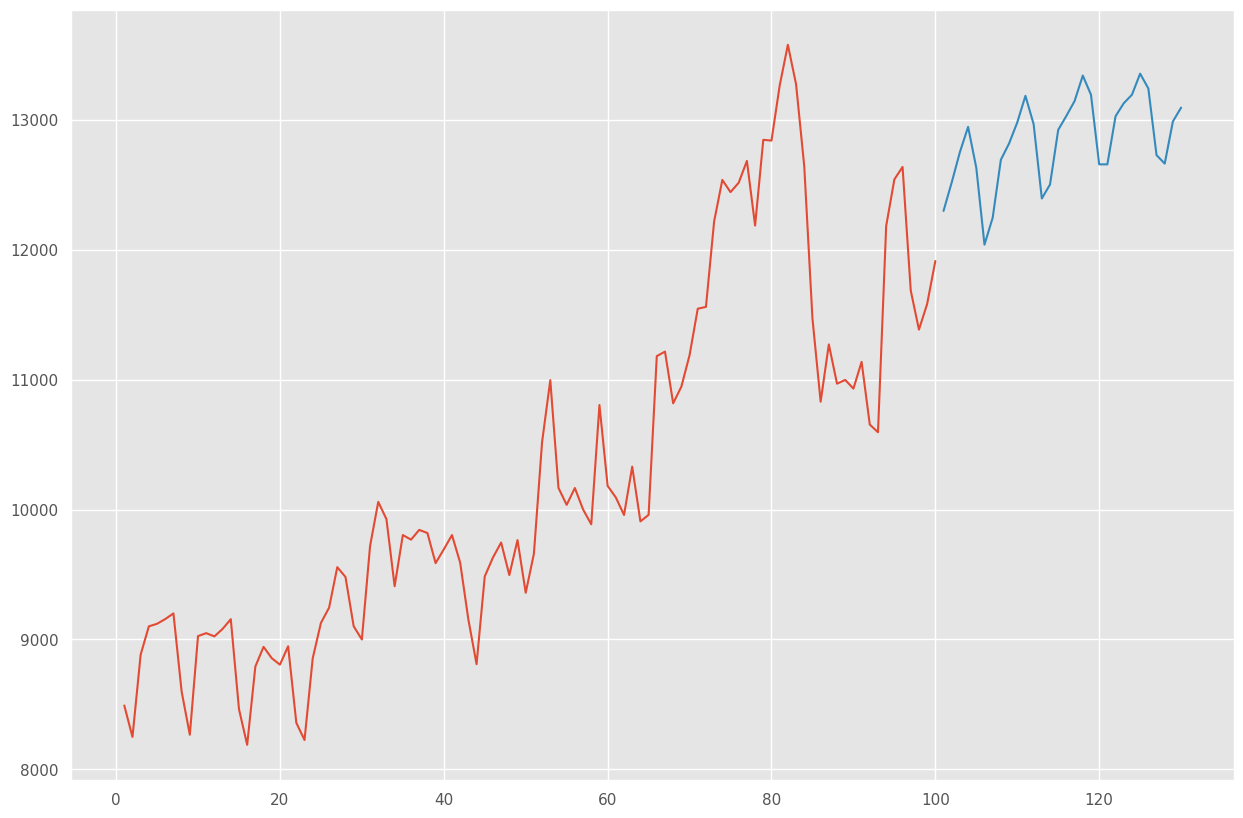

In [107]:
print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

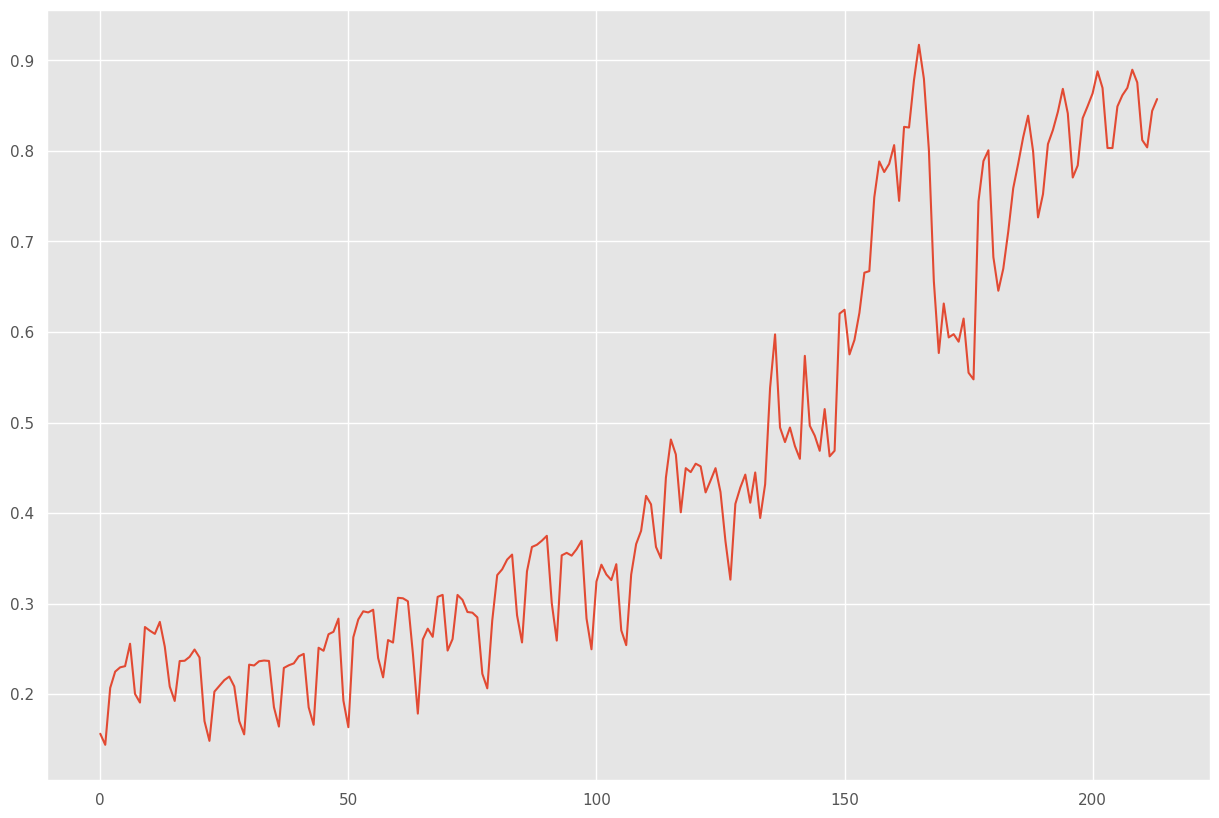

In [108]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])